# **Trabalho da Disciplina de Modelagem para AI**

Esse notebook tem o objetivo de construir e comparar 3 modelos de Ml: RNA, Random Florest e SVM, se baseando na dissertação "Desenvolvimento de modelos preditivos para a gaseificação de biomassa usando redes neurais artificiais"

# **Construção e Tratamento do Banco de Dados**

Com o objetivo de alimentar modelos preditivos baseados em Redes Neurais Artificiais (RNA), foi realizada uma extensa revisão bibliográfica em artigos científicos sobre gaseificação de biomassa, visando a construção de dois bancos de dados robustos e diversificados. O primeiro banco de dados (Df1) foi destinado ao treinamento e teste do modelo, enquanto o segundo (Df2) foi reservado exclusivamente para a validação do desempenho da RNA.

Durante a montagem dos bancos, foram extraídas diversas variáveis de interesse, sempre que disponíveis nos artigos analisados. As informações incluíram: tipo de gaseificador, tipo e composição elementar da biomassa (C, H, O, N e S), propriedades físico-químicas (material volátil - VM, umidade - MC, cinzas, carbono fixo - FC), parâmetros operacionais (razão de equivalência - ER, temperatura, razão vapor/biomassa - S/B), composição dos gases de saída (H₂, CO, CO₂, CH₄, N₂), além de métricas de desempenho como rendimento do gás (GY), eficiência do gás frio (CGE), eficiência de conversão do carbono (CCE) e poder calorífico inferior (LHV). Parte dos dados foi extraída manualmente de gráficos utilizando o software WebPlotDigitizer v4.5.

Para garantir a qualidade e coerência dos dados, foram aplicados diversos filtros, que resultaram na exclusão de:

Dados oriundos de simulações (mantendo-se apenas dados experimentais);

Registros sem valor para VM ou com VM igual a zero;

Casos com ER e S/B igual a zero;

Entradas sem informações sobre os principais gases de saída (H₂, CO, CO₂, CH₄, N₂);

Dados sem registro de temperatura;

Casos que envolviam carvão mineral, fora do escopo do estudo.

Além disso, foi realizada uma padronização dos dados para garantir sua consistência. Foram verificadas somas percentuais de composição elementar (C, H, O, N, S) e das frações físicas (VM, MC, cinzas, FC), excluindo entradas cuja soma ultrapassasse 100%. Também foram removidos valores considerados atípicos com base em análise estatística (histogramas) e comparação com a literatura, notadamente com os intervalos descritos por Vassilev (2010), referência consolidada na caracterização de biomassas.

Exemplos de dados excluídos com base nessa análise incluem:

Carbono acima de 70,9% (ex.: 77,55% e 79,34%);

Hidrogênio abaixo de 3,2% (ex.: 2,36%);

Nitrogênio entre 6,13% e 6,81%, devido à presença de classes vazias nos histogramas;

Umidade superior a 18%, para evitar distorções nos dados;

Valor extremo de cinzas (36,53%);

Temperaturas fora de faixas típicas observadas (353–562 °C e 911–1050 °C);

S/B com valor atípico de 4,04.

Após o processo de curadoria, o banco de dados final contou com 603 registros válidos, distribuídos da seguinte forma:

Df1 (treinamento/teste): 491 registros (81,43% do total)

80% para treinamento: 393 dados (65,17% do total)

20% para teste: 98 dados (16,25% do total)

Df2 (validação): 112 registros (18,57% do total)


O dataset desse trabalho foi fornecido pelo professor da disciplina, Brunno Ferreira dos Santos e coorientador da dissertação, mas não recebemos o datset tratado, ao realizar os tratamentos no excel, ficamos com 581 linhas e não 603.

# **Análise exploratória de dados**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_excel('/content/drive/My Drive/Modelagem/BD.xlsx', sheet_name='T')
df.head() # Mostra as 5 primeiras linhas do banco de dados(df), a importação funcionou, podemos ver todas as 14 variáveis e com seus tipos corretos.

,C [%wt db],H [%wt db],O [%wt db],N [%wt db],Volatile matter (VM) [%],Moisture content (MC) [%wt],Ash [%wt],ER [-],T [ºC],Steam/ Biomass,CO [%vol],CO2 [%vol],CH4 [%vol],H2 [%vol]
0,46.4,5.7,47.7,0.2,81.3435,8.5,1.0065,0.32,750.0,0.0,33.607908,40.127089,8.166627,14.709343
1,46.4,5.7,47.7,0.2,81.3435,8.5,1.0065,0.36,776.5,0.0,29.044615,38.192880,7.593511,16.538982
2,46.4,5.7,47.7,0.2,81.3435,8.5,1.0065,0.38,790.5,0.0,29.645814,37.396504,7.980681,19.158234
3,46.4,5.7,47.7,0.2,81.3435,8.5,1.0065,0.41,808.4,0.0,28.223844,40.778589,8.442822,16.642336
4,46.4,5.7,47.7,0.2,81.3435,8.5,1.0065,0.43,834.2,0.0,25.956697,40.181269,7.980866,12.235650


In [ ]:
df.describe() # Mostra um resumo estatístico.

,C [%wt db],H [%wt db],O [%wt db],N [%wt db],Volatile matter (VM) [%],Moisture content (MC) [%wt],Ash [%wt],ER [-],T [ºC],Steam/ Biomass,CO [%vol],CO2 [%vol],CH4 [%vol],H2 [%vol]
count,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.00000,581.000000,581.000000,581.00000,581.000000,581.000000,581.000000,581.000000
mean,49.052809,6.096239,44.173769,0.490781,76.002891,8.244578,4.15076,0.191267,798.352496,0.45327,21.270204,22.886610,7.040553,30.898792
std,3.313326,0.893637,3.576580,0.577395,8.173901,2.128438,5.71012,0.173932,65.422442,0.61206,9.321969,10.505590,4.107043,17.487071
min,38.920000,3.600000,37.040404,0.000000,55.540000,5.000000,0.08000,0.000000,565.850000,0.00000,4.270000,0.000000,0.000000,5.240000
25%,47.000000,5.594552,41.970000,0.120000,73.143588,6.560000,0.30000,0.000000,750.000000,0.00000,14.970000,15.610000,3.620000,15.574468
50%,49.130000,6.170000,44.160000,0.200000,76.478580,8.000000,1.00650,0.220000,800.000000,0.00000,17.748268,22.590000,6.800000,31.200000
75%,50.820000,6.540000,46.905073,0.620000,80.000000,9.300000,5.40000,0.320000,840.000000,0.63000,28.223844,29.387991,10.727483,39.919169
max,56.575977,7.820000,53.690000,3.100000,94.130000,15.020000,19.52000,0.610000,900.000000,2.70000,52.000000,50.456073,24.100000,84.620000


In [ ]:
df.isnull().sum() # Conta os valores nulos em cada coluna

,0
C [%wt db],0
H [%wt db],0
O [%wt db],0
N [%wt db],0
Volatile matter (VM) [%],0
Moisture content (MC) [%wt],0
Ash [%wt],0
ER [-],0
T [ºC],0
Steam/ Biomass,0


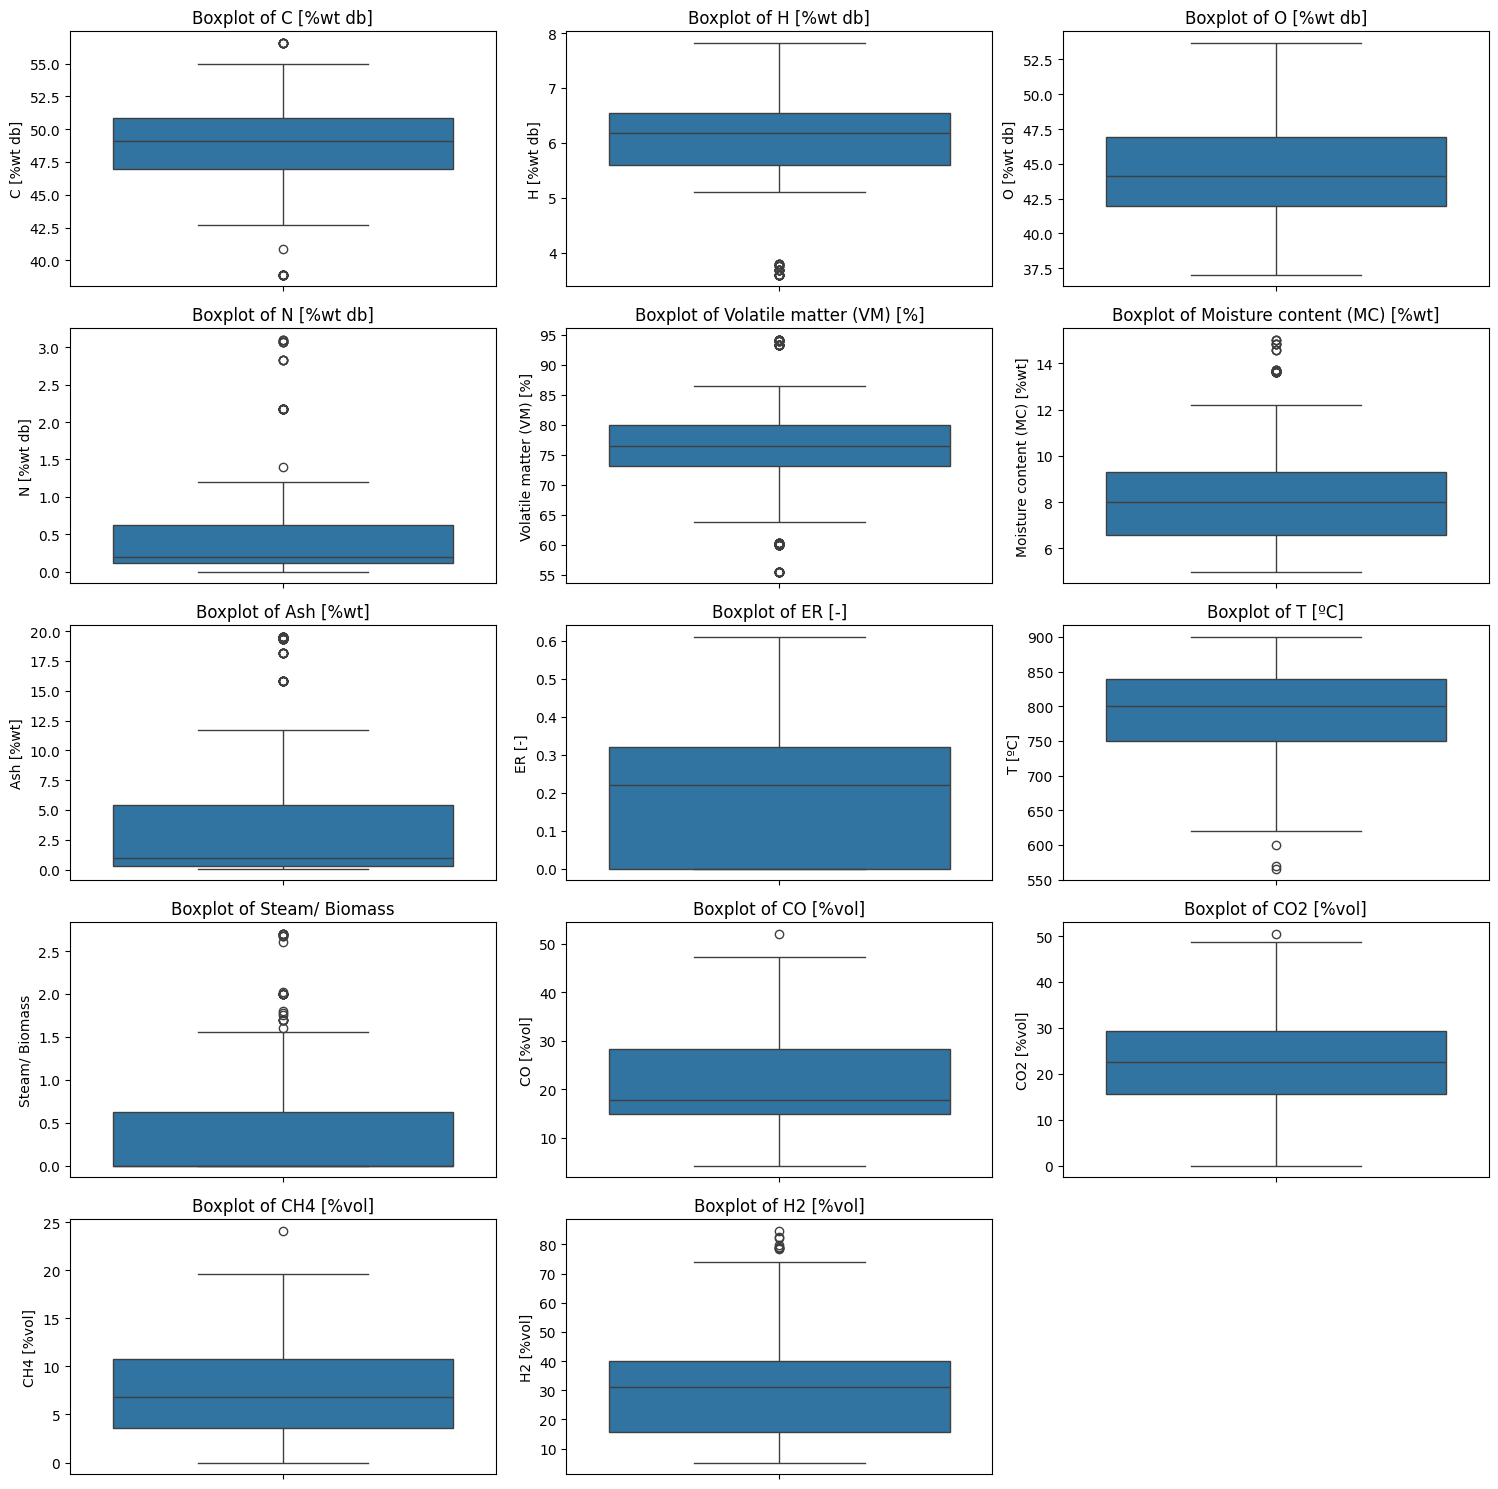

In [ ]:
num_cols = 3
num_rows = int(np.ceil(len(df.columns) / num_cols))

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 15))


axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.boxplot(ax=axes[i], y=df[column])
    axes[i].set_title(f'Boxplot of {column}')

for i in range(len(df.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [ ]:
y1 = df['C [%wt db]']
y2 = df['H [%wt db]']
y3 = df['O [%wt db]']
y4 = df['N [%wt db]']
y5 = df['Volatile matter (VM) [%]']
y6 = df['Moisture content (MC) [%wt]']
y7 = df['Ash [%wt]']
y8 = df[ 'ER [-]']
y9 = df[ 'T [ºC]']
y10 = df['Steam/ Biomass']
y11 = df['CO [%vol]']
y12 = df['CO2 [%vol]']
y13 = df['CH4 [%vol]']
y14 = df['H2 [%vol]']

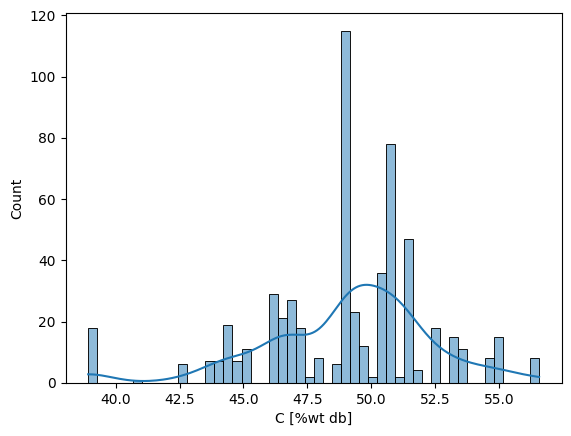

In [ ]:
sns.histplot(y1, bins=50, kde=True)
plt.show()

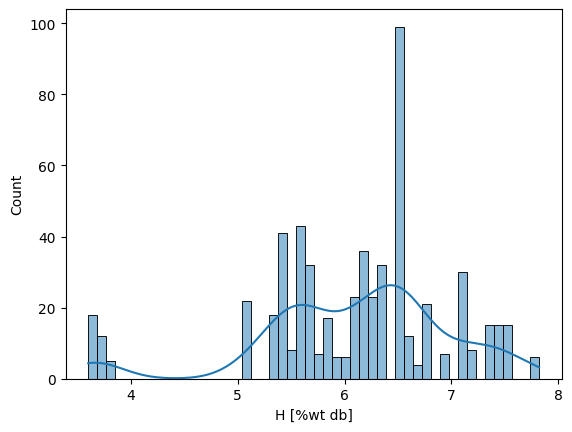

In [ ]:
sns.histplot(y2, bins=50, kde=True)
plt.show()

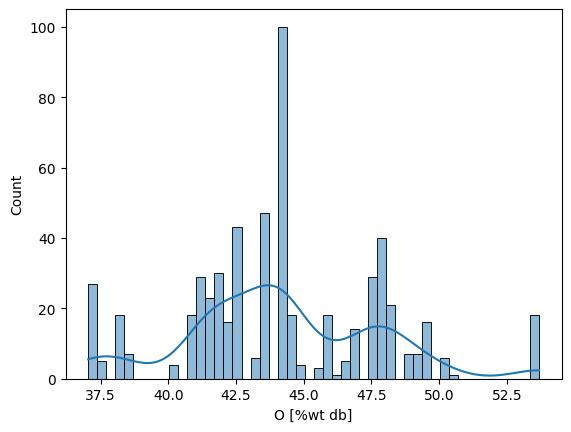

In [ ]:
sns.histplot(y3, bins=50, kde=True)
plt.show()

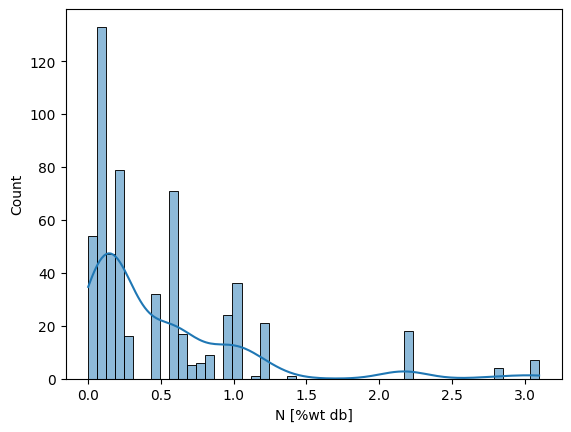

In [ ]:
sns.histplot(y4, bins=50, kde=True)
plt.show()

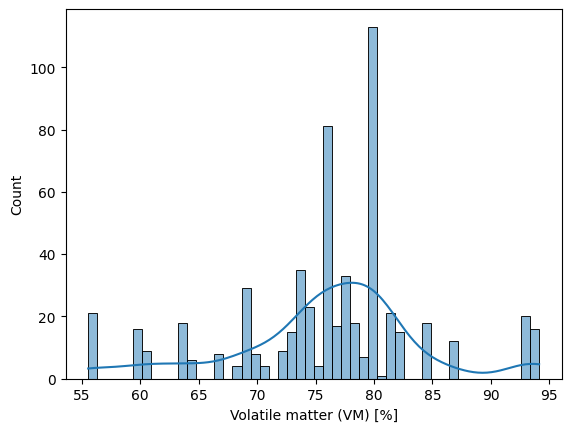

In [ ]:
sns.histplot(y5, bins=50, kde=True)
plt.show()

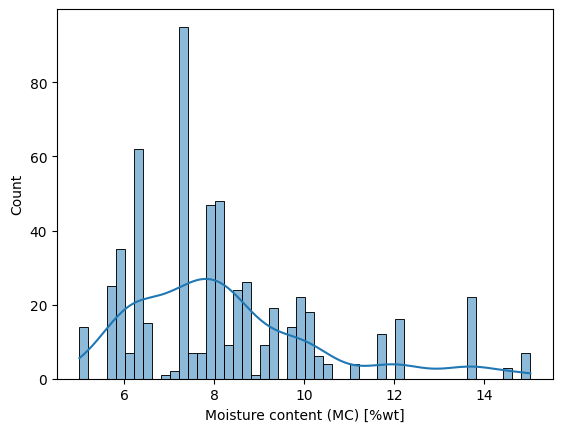

In [ ]:
sns.histplot(y6, bins=50, kde=True)
plt.show()

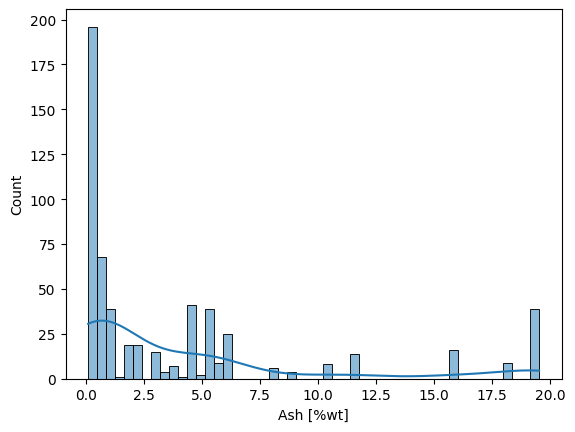

In [ ]:
sns.histplot(y7, bins=50, kde=True)
plt.show()

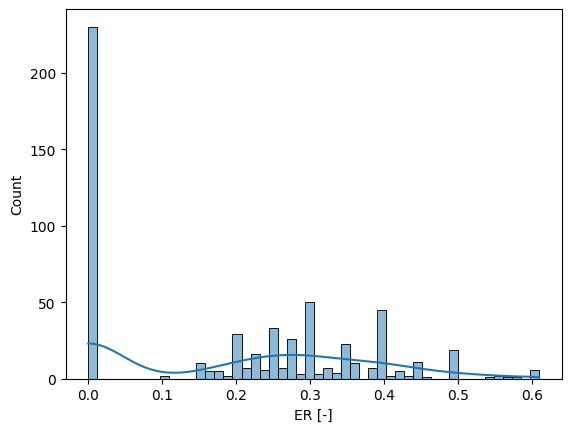

In [ ]:
sns.histplot(y8, bins=50, kde=True)
plt.show()

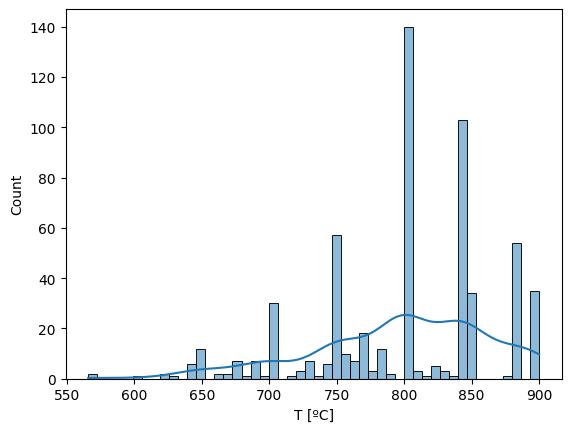

In [ ]:
sns.histplot(y9, bins=50, kde=True)
plt.show()

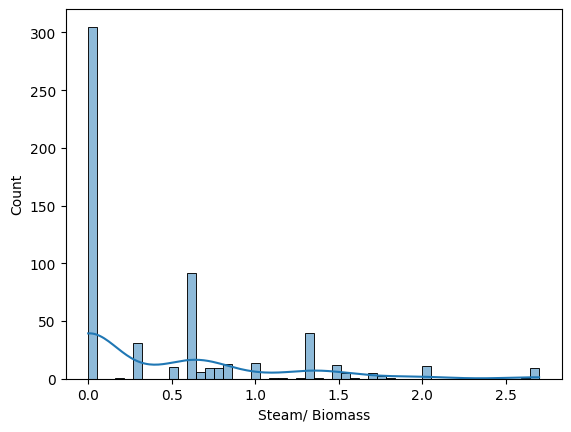

In [ ]:
sns.histplot(y10, bins=50, kde=True)
plt.show()

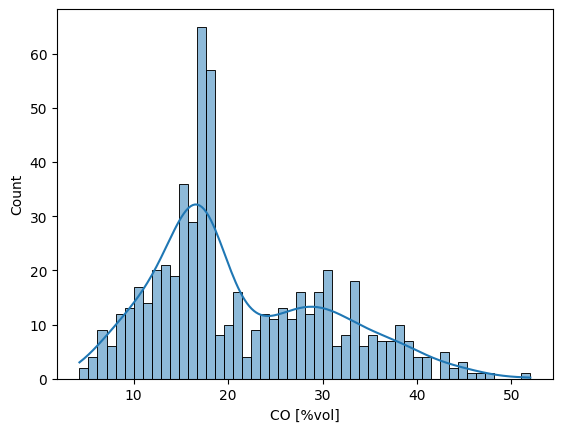

In [ ]:
sns.histplot(y11, bins=50, kde=True)
plt.show()

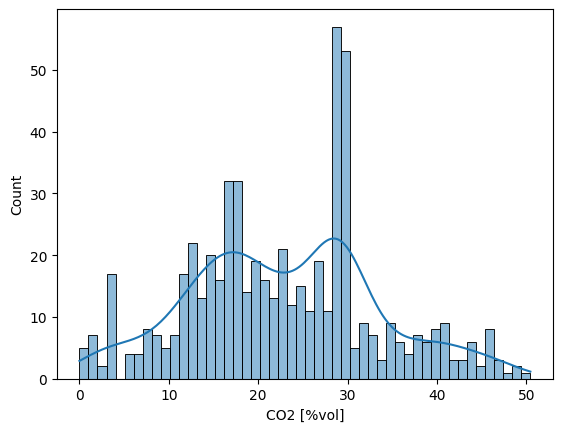

In [ ]:
sns.histplot(y12, bins=50, kde=True)
plt.show()

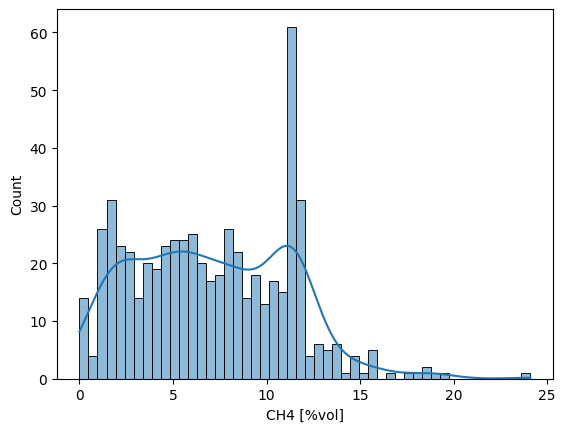

In [ ]:
sns.histplot(y13, bins=50, kde=True)
plt.show()

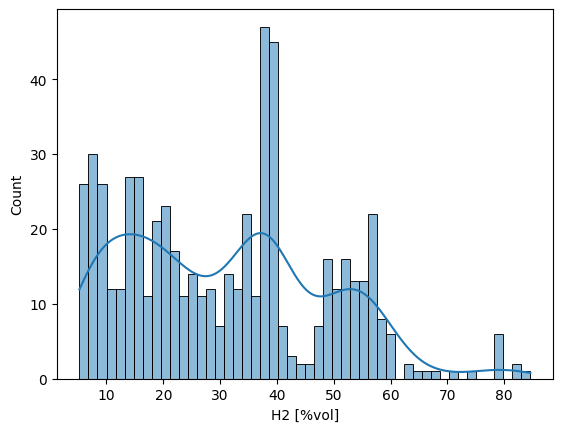

In [ ]:
sns.histplot(y14, bins=50, kde=True)
plt.show()

### Correlação de Spearman

Mede associação monótona,não necessariamente linear.

Varia entre -1 e 1:

+1: correlação positiva perfeita;

-1: correlação negativa perfeita;

0: nenhuma associação monotônica.


|       Valor da correlação    |       Classificação       |
| ---------------------------: | ------------------------- |
|                  0.00 a 0.19 | Muito fraca / desprezível |
|                  0.20 a 0.39 | Fraca                     |
|                  0.40 a 0.59 | Moderada                  |
|                  0.60 a 0.79 | Forte                     |
|                  0.80 a 1.00 | Muito forte               |


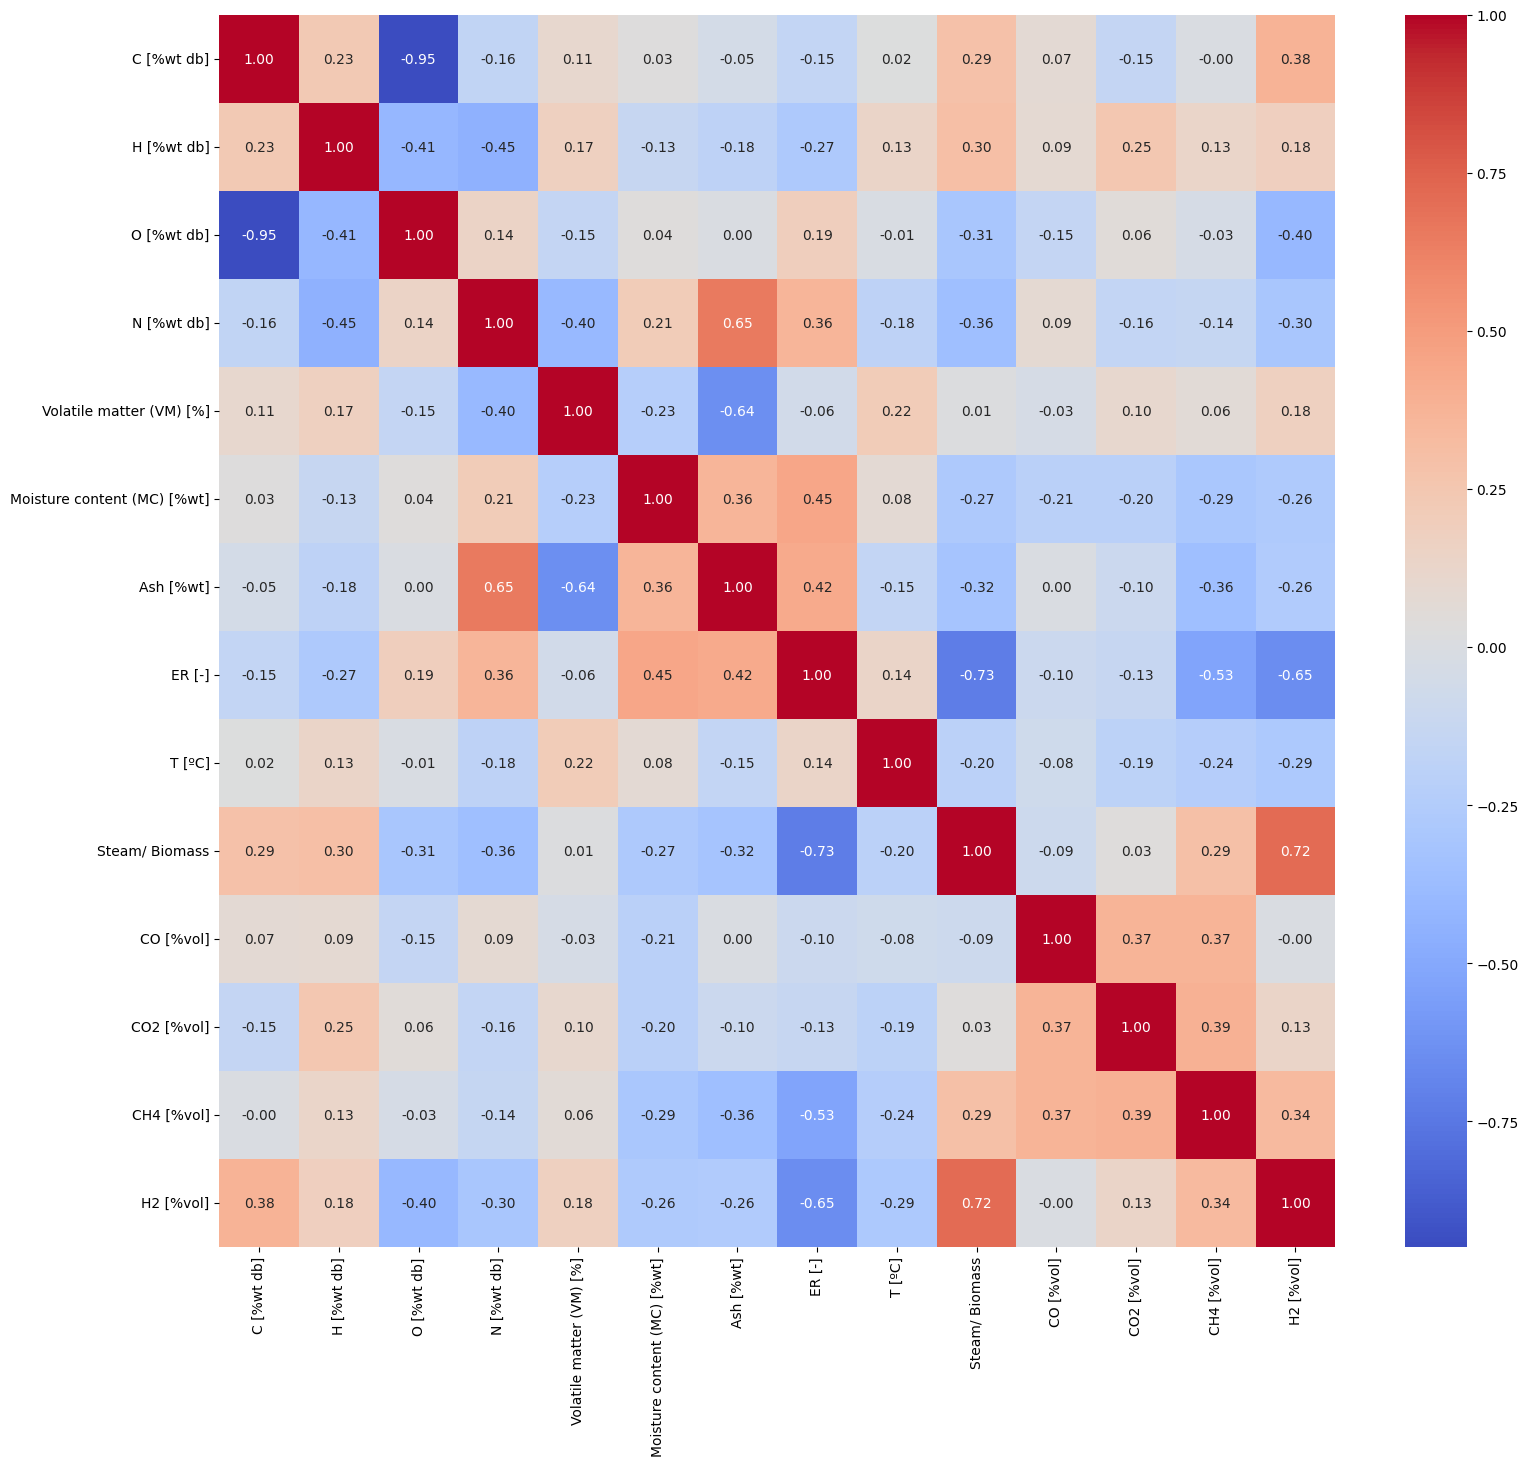

In [ ]:
corr_S = df.iloc[:,:].corr(method='spearman')
plt.figure(figsize=(18, 16))
sns.heatmap(corr_S, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [14]:
cols_input = ['CO [%vol]', 'CO2 [%vol]', 'CH4 [%vol]', 'H2 [%vol]']
cols_output = ['C [%wt db]', 'H [%wt db]', 'O [%wt db]', 'N [%wt db]']
# Cria um novo DataFrame apenas com as colunas selecionadas
df_subset = df[cols_input + cols_output]
# Calcula a correlação de Spearman para o subconjunto de dados
corr_S_subset = df_subset.corr(method='spearman')
# Seleciona apenas as correlações entre os inputs e outputs
corr_S_selected = corr_S_subset.loc[cols_input, cols_output]
# Imprime a tabela de correlação no formato markdown
print(corr_S_selected.to_markdown())

|            |   C [%wt db] |   H [%wt db] |   O [%wt db] |   N [%wt db] |
|:-----------|-------------:|-------------:|-------------:|-------------:|
| CO [%vol]  |   0.0736445  |    0.0855207 |   -0.147393  |     0.0856   |
| CO2 [%vol] |  -0.147979   |    0.248132  |    0.0555292 |    -0.155661 |
| CH4 [%vol] |  -0.00417378 |    0.130553  |   -0.0310922 |    -0.138972 |
| H2 [%vol]  |   0.377975   |    0.182452  |   -0.400742  |    -0.303706 |


### Análise Variável de Composição, Saída vs Entrada.

Carbono (C)

C vs CO = +0.074
Pequena correlação positiva. Isso sugere que o teor de carbono da biomassa não influencia fortemente a geração de CO diretamente, mas pode contribuir indiretamente via reações com CO₂ (Boudouard) ou H₂O (água-gás).

C vs CO₂ = −0.148
Biomassas mais carbonosas tendem a produzir menos CO₂. Isso reforça a formação de CO (via Boudouard) em vez de CO₂.

C vs CH₄ = −0.004
Essencialmente nula. O teor de carbono não está correlacionado diretamente com CH₄.

C vs H₂ = +0.378
Correlação significativa. Maior teor de carbono → mais reações água-gás e Boudouard → mais hidrogênio como subproduto.

Hidrogênio (H)

H vs CO = +0.086
Pequena correlação positiva, sem grande significado físico direto.

H vs CO₂ = +0.248
Biomassas mais ricas em H tendem a gerar mais CO₂, possivelmente pela oxidação de H em H₂O, seguida por reações deslocamento água-gás.

H vs CH₄ = +0.131
Correlação moderada → presença de mais hidrogênio favorece a formação de CH₄ (reação de metanação).

H vs H₂ = +0.182
Esperada, porém mais fraca do que o esperado. Pode indicar que a formação de H₂ depende mais da reação com vapor (Steam/Biomass) do que do teor de H original na biomassa.

Oxigênio (O)

O vs CO = −0.147
Biomassas mais oxigenadas produzem menos CO, provavelmente devido à oxidação do carbono diretamente para CO₂.

O vs CO₂ = +0.056
Fraca correlação positiva. Reflete a tendência de biomassa rica em O formar mais CO₂ (oxidação direta).

O vs CH₄ = −0.031
Praticamente nula. O oxigênio da biomassa não influencia diretamente o metano.

O vs H₂ = −0.401
Correlação negativa significativa. Maior oxigênio → menor H₂, possivelmente porque há mais formação de H₂O e CO₂, reduzindo o H₂ livre.

Nitrogênio (N)

N vs CO = +0.086
Fraca e sem relevância técnico-química direta.

N vs CO₂ = −0.156
Pode indicar que biomassa com mais N tende a oxidar menos carbono em CO₂, ou efeito indireto da composição.

N vs CH₄ = −0.139
Pequeno impacto negativo. Nitrogênio não contribui para formação de CH₄ e pode indicar menor proporção de compostos voláteis formadores de hidrocarbonetos.

N vs H₂ = −0.304
Correlação negativa. Biomassas mais nitrogenadas tendem a formar menos H₂, possivelmente porque o N não participa das reações de geração de gás combustível e ocupa espaço na estrutura da biomassa que poderia gerar H.


In [13]:
cols_input = ['CO [%vol]', 'CO2 [%vol]', 'CH4 [%vol]', 'H2 [%vol]']
cols_output = ['Volatile matter (VM) [%]', 'Moisture content (MC) [%wt]', 'Ash [%wt]']
# Cria um novo DataFrame apenas com as colunas selecionadas
df_subset = df[cols_input + cols_output]
# Calcula a correlação de Spearman para o subconjunto de dados
corr_S_subset = df_subset.corr(method='spearman')
# Seleciona apenas as correlações entre os inputs e outputs
corr_S_selected = corr_S_subset.loc[cols_input, cols_output]
# Imprime a tabela de correlação no formato markdown
print(corr_S_selected.to_markdown())

|            |   Volatile matter (VM) [%] |   Moisture content (MC) [%wt] |    Ash [%wt] |
|:-----------|---------------------------:|------------------------------:|-------------:|
| CO [%vol]  |                 -0.0329171 |                     -0.2086   |  4.16585e-05 |
| CO2 [%vol] |                  0.102571  |                     -0.204344 | -0.0985575   |
| CH4 [%vol] |                  0.0617403 |                     -0.294114 | -0.360424    |
| H2 [%vol]  |                  0.17618   |                     -0.263531 | -0.25909     |


### Saída vs Parâmetros fisico-químicos

VM mostra tendência positiva com H₂, indicando que biomassa rica em voláteis pode contribuir levemente para maior produção de hidrogênio.
→ Impacto geral fraco, mas ainda o melhor dos três parâmetros.

Umidade tem efeito consistentemente negativo sobre os quatro gases.
→ Reduz principalmente CH₄ e H₂.

Cinzas estão negativamente correlacionadas com os principais gases combustíveis, especialmente CH₄.
→ Altas cinzas prejudicam o rendimento energético da gaseificação.




In [15]:
cols_input = ['CO [%vol]', 'CO2 [%vol]', 'CH4 [%vol]', 'H2 [%vol]']
cols_output = ['ER [-]', 'T [ºC]', 'Steam/ Biomass']
# Cria um novo DataFrame apenas com as colunas selecionadas
df_subset = df[cols_input + cols_output]
# Calcula a correlação de Spearman para o subconjunto de dados
corr_S_subset = df_subset.corr(method='spearman')
# Seleciona apenas as correlações entre os inputs e outputs
corr_S_selected = corr_S_subset.loc[cols_input, cols_output]
# Imprime a tabela de correlação no formato markdown
print(corr_S_selected.to_markdown())

|            |     ER [-] |     T [ºC] |   Steam/ Biomass |
|:-----------|-----------:|-----------:|-----------------:|
| CO [%vol]  | -0.0997952 | -0.0803417 |       -0.0889539 |
| CO2 [%vol] | -0.129747  | -0.194352  |        0.0339787 |
| CH4 [%vol] | -0.529288  | -0.239414  |        0.294168  |
| H2 [%vol]  | -0.646308  | -0.285396  |        0.717412  |


### Parâmetros operacionais vs. Gás produzido

Steam/Biomass

Steam/Biomass vs H₂ = +0.717 → Altamente positivo, condiz com a literatura: mais vapor favorece a reação água-gás, aumentando a produção de H₂.

Steam/Biomass vs CH₄ = +0.294 → Vapor também contribui na metanação, mas com efeito menor.

Steam/Biomass vs CO/CO₂ ≈ fraco → Menor impacto na formação desses gases diretamente.

ER (Equivalence Ratio)

ER vs H₂ = -0.646 → Quanto maior o ER, menor o H₂, pois mais oxigênio leva a mais combustão e menos gás combustível.

ER vs CH₄ = -0.529 → Mesma tendência.

ER vs CO₂ = ligeiramente negativa (-0.13) → Curioso, poderia esperar maior CO₂, talvez por oxidação de H₂ e CO.

ER vs Steam/Biomass = -0.725 → Compreensível, pois vapor substitui O₂ como agente gaseificante.

Temperatura (T)

T vs H₂ = -0.285, T vs CO = -0.080, ambos fracos → Inesperado, pois temperatura geralmente favorece H₂ e CO. Isso pode indicar uma faixa operacional estreita ou controle indireto por outro parâmetro (ex: ER ou vapor).

T vs CH₄ = -0.239 → Esperado: altas temperaturas destroem CH₄.


In [5]:
!pip install prince

import prince

pca = prince.PCA(
    n_components=14,
    n_iter=3,
    rescale_with_mean=True,
    rescale_with_std=True,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)

pca = pca.fit(
    df,
    sample_weight=None,
    column_weight=None,
    supplementary_columns=None
)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.8/417.8 kB 5.6 MB/s eta 0:00:00


In [6]:
pca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,3.920,28.00%,28.00%
1,2.016,14.40%,42.40%
2,1.796,12.83%,55.23%
3,1.428,10.20%,65.43%
4,0.992,7.08%,72.51%
5,0.838,5.99%,78.50%
6,0.764,5.46%,83.96%
7,0.567,4.05%,88.01%
8,0.518,3.70%,91.71%


In [ ]:
pca.column_contributions_.style.format('{:.0%}')

component,0,1,2,3,4,5,6,7,8,9,10,11,12,13
variable,,,,,,,,,,,,,,
C [%wt db],12%,4%,7%,18%,4%,0%,0%,1%,6%,0%,2%,2%,0%,45%
H [%wt db],8%,1%,3%,5%,32%,1%,1%,10%,21%,6%,7%,2%,0%,4%
O [%wt db],12%,3%,5%,22%,0%,0%,3%,0%,2%,1%,0%,1%,0%,50%
N [%wt db],7%,4%,2%,0%,0%,29%,30%,19%,2%,1%,0%,1%,3%,2%
Volatile matter (VM) [%],4%,18%,8%,8%,3%,0%,11%,3%,1%,3%,0%,1%,38%,0%
Moisture content (MC) [%wt],6%,1%,12%,3%,13%,1%,14%,25%,10%,7%,6%,0%,2%,0%
Ash [%wt],9%,10%,8%,4%,12%,0%,0%,2%,4%,2%,0%,3%,44%,0%
ER [-],12%,7%,0%,6%,0%,9%,9%,0%,0%,0%,11%,41%,4%,0%
T [ºC],1%,17%,2%,0%,10%,28%,27%,0%,8%,2%,0%,5%,0%,0%


In [ ]:
pca.column_correlations

component,0,1,2,3,4,5,6,7,8,9,10,11,12,13
variable,,,,,,,,,,,,,,
C [%wt db],-0.676433,0.273778,0.344192,0.506991,0.209212,-0.013524,0.019924,-0.067496,-0.173807,-0.049041,-0.075683,0.063781,0.006088,-0.024960
H [%wt db],-0.545816,0.162820,-0.235658,0.266635,-0.560083,-0.081456,0.089903,0.234995,0.330901,-0.179199,0.140642,-0.061526,-0.009510,-0.007013
O [%wt db],0.699650,-0.243546,-0.308349,-0.559772,-0.019909,-0.050354,-0.141302,-0.051786,0.101058,0.056875,0.025826,-0.047361,-0.010717,-0.026430
N [%wt db],0.535661,-0.270678,0.167208,0.071445,-0.042642,0.494633,0.481987,0.325892,-0.098987,0.071343,0.018626,0.043939,-0.067465,-0.004734
Volatile matter (VM) [%],-0.402590,0.596406,-0.386895,-0.347283,0.169717,0.028124,0.285005,0.134740,-0.083609,0.131336,0.037211,-0.043575,0.235428,-0.000955
Moisture content (MC) [%wt],0.468247,0.160240,0.472240,0.216926,0.355535,-0.095131,-0.321523,0.376195,0.223484,0.181958,0.132903,-0.024666,0.057621,-0.000057
Ash [%wt],0.597055,-0.439453,0.381028,0.251884,-0.351490,-0.022922,-0.010894,-0.118703,-0.144755,-0.105598,0.029351,-0.083153,0.252225,-0.001193
ER [-],0.697173,0.383741,-0.073657,0.284185,0.066536,-0.278991,0.255539,-0.018895,0.001242,0.018150,-0.176420,-0.309339,-0.073755,0.000197
T [ºC],0.144202,0.582198,-0.164396,0.082354,-0.317433,0.486282,-0.453799,0.022198,-0.203173,0.093920,-0.034491,-0.103908,-0.026373,0.000071


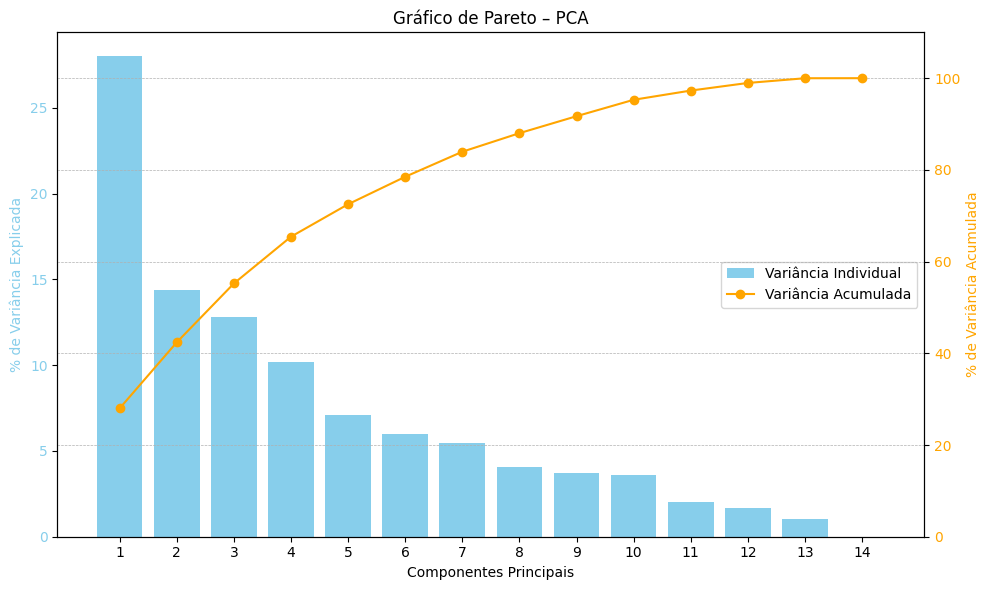

In [7]:
eigen_df = pca.eigenvalues_summary

# Extração dos dados
eigenvalues = eigen_df['eigenvalue'].values
variance = eigen_df['% of variance'].str.replace('%','').astype(float).values
cumulative = eigen_df['% of variance (cumulative)'].str.replace('%','').astype(float).values

# Plotando o gráfico de Pareto
fig, ax1 = plt.subplots(figsize=(10,6))

# Barras: variância individual
ax1.bar(range(1, len(variance)+1), variance, color='skyblue', label='Variância Individual')
ax1.set_xlabel('Componentes Principais')
ax1.set_ylabel('% de Variância Explicada', color='skyblue')
ax1.set_xticks(np.arange(1, len(variance)+1))
ax1.tick_params(axis='y', labelcolor='skyblue')

# Linha: variância acumulada
ax2 = ax1.twinx()
ax2.plot(range(1, len(cumulative)+1), cumulative, color='orange', marker='o', label='Variância Acumulada')
ax2.set_ylabel('% de Variância Acumulada', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.set_ylim(0, 110)

# Legenda combinada
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='center right')

plt.title('Gráfico de Pareto – PCA')
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

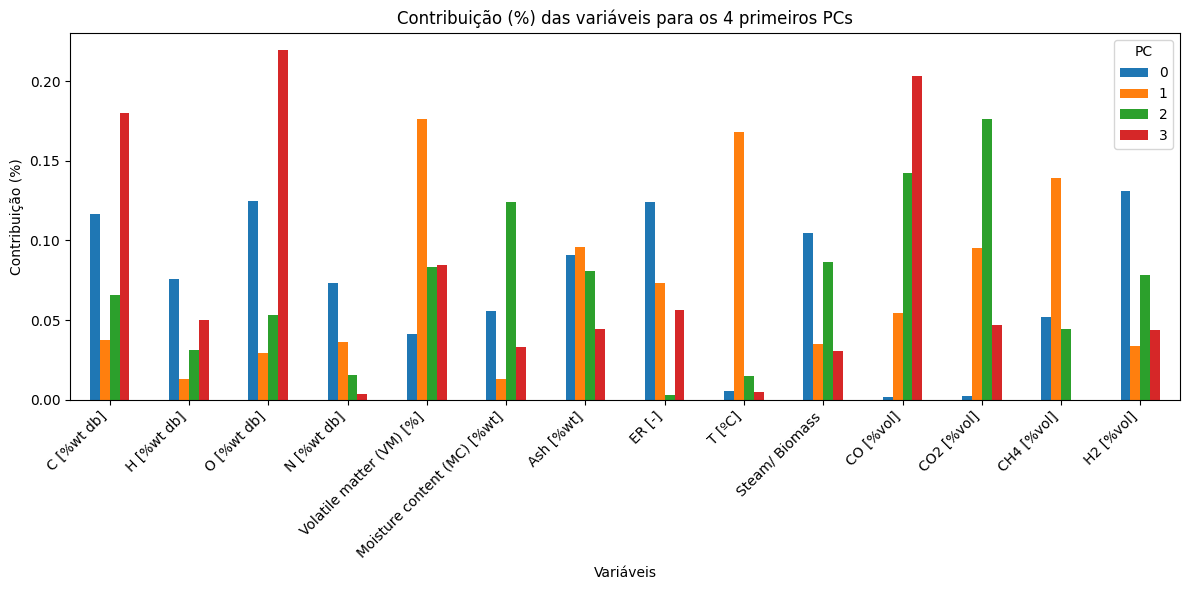

In [19]:
# Gráfico:  Contribuição das variáveis nos primeiros 4 PCs
contributions = pca.column_contributions_
plt.figure(figsize=(12,6))
contributions.iloc[:, :4].plot(kind='bar', figsize=(12,6))
plt.title('Contribuição (%) das variáveis para os 4 primeiros PCs')
plt.ylabel('Contribuição (%)')
plt.xlabel('Variáveis')
plt.xticks(rotation=45, ha='right')
plt.legend(title='PC')
plt.tight_layout()
plt.show()

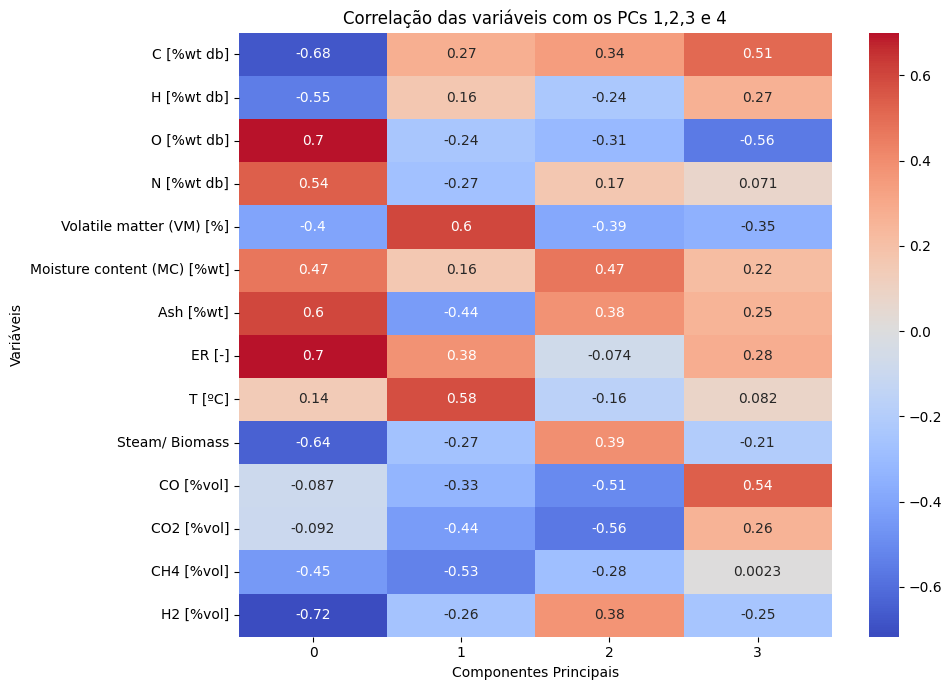

In [18]:
# --- Gráfico: Heatmap das correlações entre variáveis e primeiros 4 PCs ---
correlations = pca.column_correlations
plt.figure(figsize=(10,7))
sns.heatmap(correlations.iloc[:, :4], annot=True, cmap='coolwarm', center=0)
plt.title('Correlação das variáveis com os PCs 1,2,3 e 4')
plt.xlabel('Componentes Principais')
plt.ylabel('Variáveis')
plt.tight_layout()
plt.show()

## **Construção do Modelo de Rede Neural Artificial**

Espaço reservado para a reprodução da RNA, criada na dissertação:

O modelo desenvolvido neste trabalho teve como objetivo prever a composição do gás de síntese (CO₂, CO, CH₄ e H₂) gerado no processo de gaseificação de biomassa, a partir de variáveis de entrada relacionadas à composição da biomassa e às condições operacionais do processo. As variáveis de entrada utilizadas foram: carbono (C), hidrogênio (H), oxigênio (O), nitrogênio (N), material volátil (VM), teor de umidade (MC), cinzas, razão de equivalência (ER), temperatura e razão vapor/biomassa (S/B).

Para o desenvolvimento do modelo, foram realizados 33 testes distintos, variando-se a topologia das redes neurais em termos de:

Número de camadas intermediárias (entre 1 e 4),

Quantidade de neurônios por camada (de 10 a 400),

Funções de ativação (logsig e tansig nas camadas ocultas; purelin, tansig e satlin na camada de saída),

Algoritmos de treinamento: trainbr, trainlm, traingdx, traingd, traingda, traingdm, trainbfg, traincgb, traincgf, traincgp e trainrp.

A avaliação de desempenho das redes foi baseada em duas métricas principais:

Coeficiente de determinação (R²): mede a qualidade do ajuste do modelo aos dados; quanto mais próximo de 1, melhor o desempenho.

Soma dos quadrados dos resíduos (SSE): avalia a diferença entre os valores preditos e os observados; quanto menor o SSE, melhor o modelo.

Para cada rede testada, foram registrados os valores de R² e SSE tanto para os conjuntos de treino quanto de teste, para cada uma das quatro variáveis de saída. Em seguida, foi calculada uma média ponderada dos valores de R² e SSE (treino e teste), permitindo a comparação objetiva entre as diferentes topologias.

A escolha da melhor topologia foi guiada por quatro critérios técnicos:

Desempenho mínimo: R² médio superior a 0,75.

Generalização adequada: R² do teste inferior ao de treino e SSE do teste superior ao de treino (indicação de modelo sem sobreajuste).

Consistência: diferença máxima de 0,2 entre R² de treino e teste.

Capacidade compatível com os dados disponíveis: o número total de parâmetros do modelo (Np) não pode exceder o número de dados de treino, para evitar overfitting. O cálculo de Np levou em consideração o número de neurônios por camada e os respectivos bias.

O modelo considerado ideal, denominado Rede 6, apresentou a melhor combinação de desempenho e simplicidade estrutural. Essa rede possuía:

Duas camadas intermediárias, com 10 neurônios cada,

Função de ativação logsig nas camadas intermediárias,

Função de ativação purelin na camada de saída,

Algoritmo de treinamento trainbr,

10 neurônios na camada de entrada (compatível com as 10 variáveis de entrada),

4 neurônios na camada final (para prever as quatro variáveis da composição do gás de síntese).



Ex de rede neural, livro mãos a obras:

https://github.com/ageron/handson-ml3/blob/main/10_neural_nets_with_keras.ipynb


# **Construção do Modelo de Random Florest**


Espaço reservado para a criação do modelo de Random Florest, ex mãos a obra:

https://github.com/ageron/handson-ml3/blob/main/07_ensemble_learning_and_random_forests.ipynb

# **Construção do Modelo de SVM**

Espaço reservado para a criação do modelo de SVM, ex mãos a obra:

https://github.com/ageron/handson-ml3/blob/main/05_support_vector_machines.ipynb